# 实验二 图像处理基本操作
PB19071509 王瑞哲

## >>> 实验原理

数字图像处理(Digital Image Processing)是通过计算机对图像进行去除噪声、增强、复原、分割、提取特征等处理的方法和技术。OpenCV是一个基于Apache2.0许可（开源）发行的跨平台计算机视觉和机器学习软件库，可以运行在Linux、Windows、Android和Mac OS操作系统上。它轻量且高效——由一系列 C 函数和少量 C++ 类构成，同时提供了Python、Ruby、MATLAB等语言的接口，实现了图像处理和计算机视觉方面的很多通用算法。

## >>> 实验目标

本次实验进⾏图像处理的基本操作和底层处理算法，了解数字图像的基本形式和基本滤波操作，具体包括： 

1. 图像读取、写入、平移、旋转、缩放等操作；
2. 图像滤波：平滑（均值滤波 、⾼斯滤波、中值滤波、双边滤波）、边缘提取（Sobel、Canny 、 DOG 、LOG）；
3. 图像特征：灰度直方图、颜色直方图（ RGB 空间、 HSV 空间）、 方向梯度直方图（Histogram Of Gradient）。

## >>> 实验过程

#### 1. 图像读取、写入、平移、旋转、缩放

首先导入opencv库，读入lena图片，并定义一个在Jupyter Notebook内绘制图像的函数`jshow()`

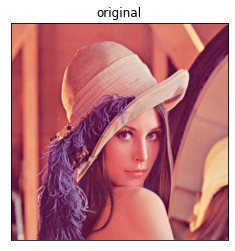

Original size: (512, 512, 3)


In [1]:
# 导入opencv库并读入图片，并利用matplotlib展示图片

import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

lena = cv2.imread("./lena.png")

# 为了方便起见定义一个本次实验所用的展示图片的函数
def jshow(img, title=None, compare_lena=True, show_axis=None, need_colortransfer=True):
    # cv2默认读取彩色图像的格式为BGR，这里将其转换为RGB以便plt展示
    if need_colortransfer:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Jupyter中使用matplotlib展示图像
    if compare_lena:
        lena = cv2.imread("./lena.png")
        lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
        plt.subplot(121)
        plt.imshow(lena)
        plt.title("original")
        if not show_axis:
            plt.xticks([]), plt.yticks([])
        plt.subplot(122)
        plt.imshow(img)
    else:
        plt.imshow(img)
    if title:
        plt.title(title)
    if not show_axis:
        plt.xticks([]), plt.yticks([])
    plt.show()

jshow(lena, "original", compare_lena=False)

# 获取原图像的尺寸，其中.shape输出的第三维维通道数
print("Original size: {}".format(lena.shape))
height, width, channel = lena.shape

> (1). 图像基本变换操作：写入

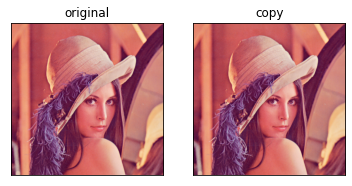

In [2]:
# 将原图像copy一份写入lena_copy.png文件中
cv2.imwrite("./lena_copy.png", lena)

lena_copy = cv2.imread("./lena_copy.png")
jshow(lena_copy, "copy")

> (2). 图像基本变换操作：平移

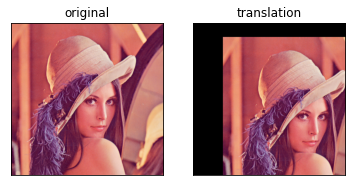

In [3]:
# 图像平移：需借助cv2.warpAffine()函数以及图像平移矩阵实现
# 平移矩阵[[1, 0, x], [0, 1, y]]，x表示水平平移量，y表示垂直平移量，且数据类型需要为float型
M = np.float32([[1,0,100],[0,1,50]])
# 参数：图像、平移矩阵、图像尺寸
lena_translation = cv2.warpAffine(lena, M, (width,height))
jshow(lena_translation, "translation")

> (3). 图像基本变换操作：旋转

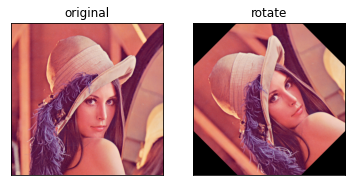

In [4]:
# 图像旋转：需借助cv2.warpAffine()函数以及getRotationMatrix2D()函数以得到旋转矩阵
# 参数：旋转中心、旋转角度、缩放比例
M = cv2.getRotationMatrix2D((width/2,height/2), 45, 1)
lena_rotate = cv2.warpAffine(lena, M, (width,height))
jshow(lena_rotate, "rotate")

> (4). 图像基本变换操作：缩放

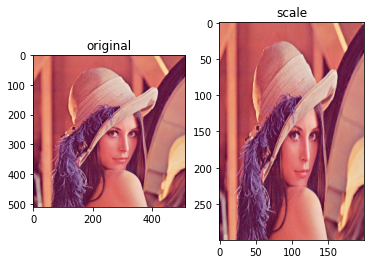

In [5]:
# 图像缩放：利用cv2.resize()函数
lena_scale = cv2.resize(lena, (200,300))    # 缩放为(200,300)像素尺寸
jshow(lena_scale, "scale", show_axis=True)

#### 2. 图像滤波：平滑与边缘提取

在滤波前需先对图像添加噪声，以便比较各类平滑算法的效果。本次实验共添加椒盐噪声、高斯噪声、泊松噪声三种噪声

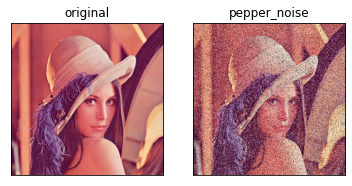

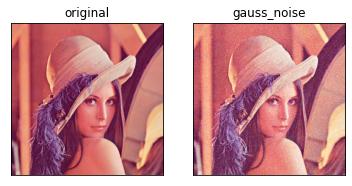

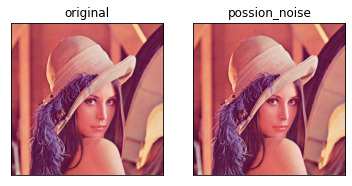

In [6]:
# 椒盐噪声
import random

prob_salt, prob_pepper = 0.1, 0.1     # 设置添加噪声比例
lena_sp = lena.copy()       # 添加噪声
for i in range(width):
    for j in range(height):
        p = random.random() # 随机数生成
        if p < prob_salt:
            lena_sp[i, j, :] = lena_sp[i, j, :]*0 + 255
        elif p > (1-prob_pepper):
            lena_sp[i, j, :] = lena_sp[i, j, :]*0

cv2.imwrite('lena_sp.png', lena_sp)
jshow(lena_sp, 'pepper_noise')

# 高斯噪声
mean, sigma = 0, 50
gauss = np.random.normal(mean, sigma, lena.shape)     # 生成高斯噪声
gauss = np.clip(gauss, a_min = 0, a_max = 255) # 设置图片添加高斯噪声之后的像素值的范围
lena_gau = lena + gauss      # 合成含噪声图像
cv2.imwrite('lena_gau.png', lena_gau)
lena_gau = cv2.imread('lena_gau.png')
jshow(lena_gau, 'gauss_noise')

# 泊松噪声
vals = len(np.unique(lena))
vals = 2 ** np.ceil(np.log2(vals))
lena_pos = np.random.poisson(lena * vals)/float(vals)
cv2.imwrite('lena_pos.png', lena_pos)
lena_pos = cv2.imread('lena_pos.png')
jshow(lena_pos, 'possion_noise')


> 图像滤波-平滑-均值滤波器

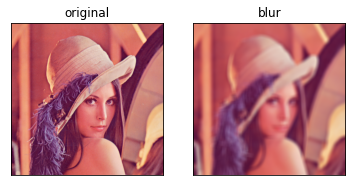

In [7]:
# 均值滤波器：cv2.blur
K = (15,15)       # 滤波核大小
lena_blur = cv2.blur(lena, K)
jshow(lena_blur, "blur")

> 图像滤波-平滑-高斯滤波器

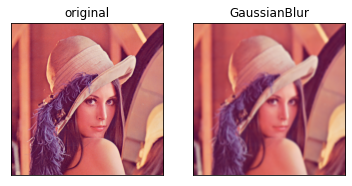

In [8]:
# 高斯滤波：cv2.GaussianBlur
lena_GaussianBlur = cv2.GaussianBlur(lena, K, 0)  # 第三个参数为x向方差
jshow(lena_GaussianBlur, "GaussianBlur")

> 图像滤波-平滑-中值滤波器

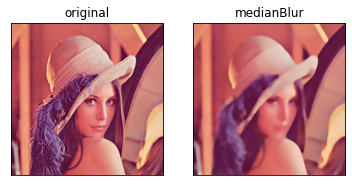

In [9]:
# 中值滤波：cv2.medianBlur
lena_medianBlur = cv2.medianBlur(lena, 15)  # 第二个参数为核大小，只需要输入一个数，因为中值滤波滤波核必须是正方形
jshow(lena_medianBlur, "medianBlur")

> 图像滤波-平滑-双边滤波器

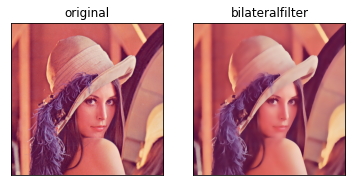

In [10]:
# 双边滤波： cv2.bilateralFilter
# 参数：图像、领域直径、空间高斯函数标准差、灰度相似性标准差
lena_bilateralfilter = cv2.bilateralFilter(lena, 15, 80, 80)
jshow(lena_bilateralfilter, "bilateralfilter")

> 采用统一的7核评估去噪结果

In [11]:
K = (7,7)       # 滤波核大小
lena_sp_blur = cv2.blur(lena_sp, K)
lena_gau_blur = cv2.blur(lena_gau, K)
lena_pos_blur = cv2.blur(lena_pos, K)
lena_sp_GaussianBlur = cv2.GaussianBlur(lena_sp, K, 0)
lena_gau_GaussianBlur = cv2.GaussianBlur(lena_gau, K, 0)
lena_pos_GaussianBlur = cv2.GaussianBlur(lena_pos, K, 0)
lena_sp_medianBlur = cv2.medianBlur(lena_sp, 7)
lena_gau_medianBlur = cv2.medianBlur(lena_gau, 7)
lena_pos_medianBlur = cv2.medianBlur(lena_pos, 7)
lena_sp_bilateralfilter = cv2.bilateralFilter(lena_sp, 7, 80, 80)
lena_gau_bilateralfilter = cv2.bilateralFilter(lena_gau, 7, 80, 80)
lena_pos_bilateralfilter = cv2.bilateralFilter(lena_pos, 7, 80, 80)


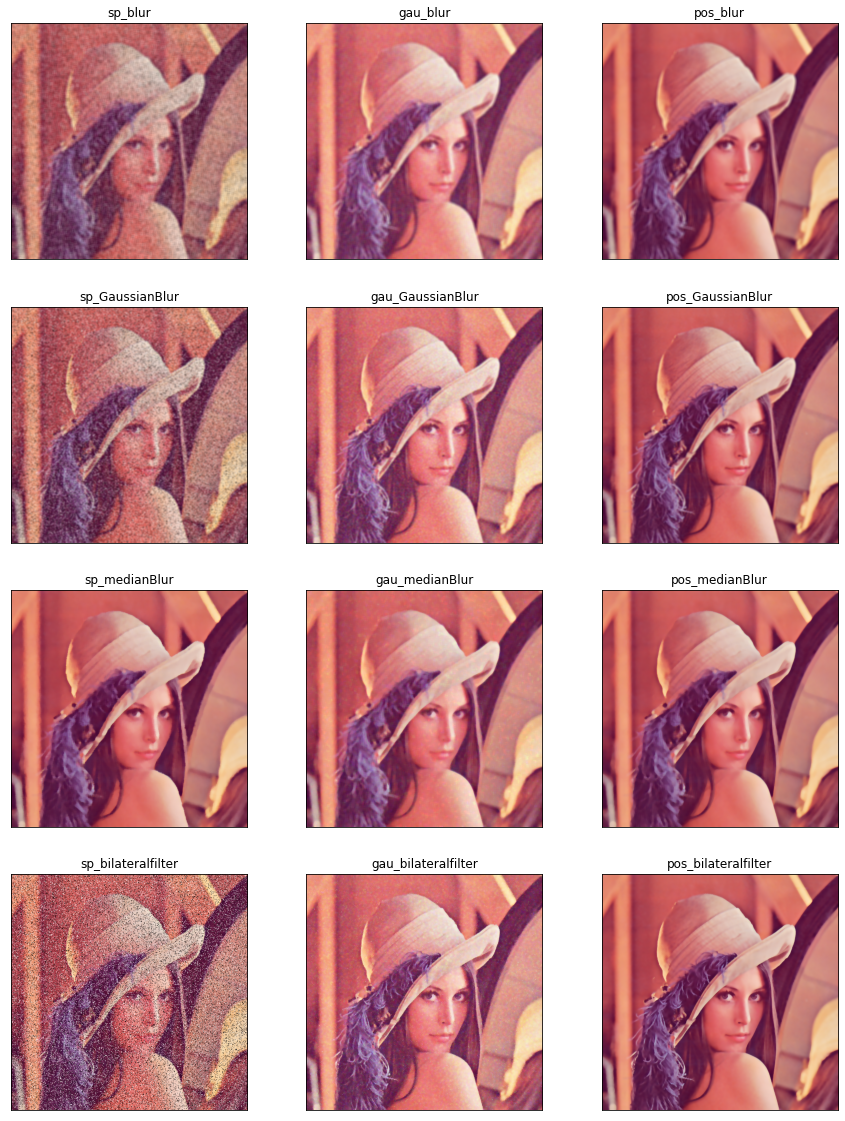

In [23]:
plt.figure(figsize=(15,20))
plt.subplot(431)
plt.imshow(cv2.cvtColor(lena_sp_blur, cv2.COLOR_BGR2RGB))
plt.title("sp_blur")
plt.xticks([]), plt.yticks([])
plt.subplot(432)
plt.imshow(cv2.cvtColor(lena_gau_blur, cv2.COLOR_BGR2RGB))
plt.title("gau_blur")
plt.xticks([]), plt.yticks([])
plt.subplot(433)
plt.imshow(cv2.cvtColor(lena_pos_blur, cv2.COLOR_BGR2RGB))
plt.title("pos_blur")
plt.xticks([]), plt.yticks([])
plt.subplot(434)
plt.imshow(cv2.cvtColor(lena_sp_GaussianBlur, cv2.COLOR_BGR2RGB))
plt.title("sp_GaussianBlur")
plt.xticks([]), plt.yticks([])
plt.subplot(435)
plt.imshow(cv2.cvtColor(lena_gau_GaussianBlur, cv2.COLOR_BGR2RGB))
plt.title("gau_GaussianBlur")
plt.xticks([]), plt.yticks([])
plt.subplot(436)
plt.imshow(cv2.cvtColor(lena_pos_GaussianBlur, cv2.COLOR_BGR2RGB))
plt.title("pos_GaussianBlur")
plt.xticks([]), plt.yticks([])
plt.subplot(437)
plt.imshow(cv2.cvtColor(lena_sp_medianBlur, cv2.COLOR_BGR2RGB))
plt.title("sp_medianBlur")
plt.xticks([]), plt.yticks([])
plt.subplot(438)
plt.imshow(cv2.cvtColor(lena_gau_medianBlur, cv2.COLOR_BGR2RGB))
plt.title("gau_medianBlur")
plt.xticks([]), plt.yticks([])
plt.subplot(439)
plt.imshow(cv2.cvtColor(lena_pos_medianBlur, cv2.COLOR_BGR2RGB))
plt.title("pos_medianBlur")
plt.xticks([]), plt.yticks([])
plt.subplot(4,3,10)
plt.imshow(cv2.cvtColor(lena_sp_bilateralfilter, cv2.COLOR_BGR2RGB))
plt.title("sp_bilateralfilter")
plt.xticks([]), plt.yticks([])
plt.subplot(4,3,11)
plt.imshow(cv2.cvtColor(lena_gau_bilateralfilter, cv2.COLOR_BGR2RGB))
plt.title("gau_bilateralfilter")
plt.xticks([]), plt.yticks([])
plt.subplot(4,3,12)
plt.imshow(cv2.cvtColor(lena_pos_bilateralfilter, cv2.COLOR_BGR2RGB))
plt.title("pos_bilateralfilter")
plt.xticks([]), plt.yticks([])
plt.show()

由上述分析可以看出：均值滤波器所有滤波器中最简单的，因为它仅仅做了滤波核内的平均操作，有点类似于神经网络中的池化层pooling；高斯滤波器或言高斯模糊是应用最广的平滑滤波方法，它利用高斯分布来对卷积核内像素做加权平均，可以达到较为符合真实情况的滤波平滑效果，且算法简洁。

中值滤波模板是用卷积框中像素的中值代替中心值，达到去噪声的目的，但这个模板一般*只在去除椒盐噪声的情况下表现较好*。前面的滤波器都是用计算得到的一个新值来取代中心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代他，卷积核的大小也是个奇数。

双边滤波（Bilateral  filter）是一种可以*保证边界清晰*的去噪的滤波器。之所以可以达到此去噪声效果，是因为滤波器是由两个函数构成。一个函数是由几何空间距离决定滤波器系数。另一个由像素差决定滤波器系数。它的构造比较复杂，即考虑了图像的空间关系，也考虑图像的灰度关系。双边滤波同时使用了空间高斯权重和灰度相似性高斯权重，确保了边界不会被模糊掉。

> 图像滤波-边缘提取-Sobel边缘提取

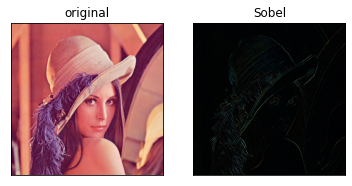

In [13]:
# Sobel边缘提取：cv2.Sobel
# 参数：图像、输出图像位深度（-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度）、x导数阶数、y导数阶数（0表示这个方向上没有求导，要求x >= 0 && dy >= 0 && dx+dy > 0）
lena_Sobel = cv2.Sobel(lena, -1, 1, 1)
jshow(lena_Sobel, "Sobel")

> 图像滤波-边缘提取-Canny边缘提取

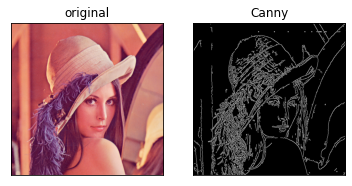

In [14]:
# Canny边缘提取：cv2.Canny
# 参数：图像、阈值1、阈值2（双阈值算法）
lena_Canny = cv2.Canny(lena, 80, 150)
jshow(lena_Canny, "Canny")

> 图像滤波-边缘提取-高斯差分DOG

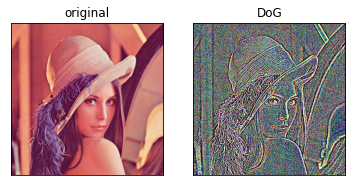

In [15]:
# 高斯差分：采用两组不同高斯参数进行滤波
lena_DoG = cv2.GaussianBlur(lena, K, 1) - cv2.GaussianBlur(lena, K, 0.1)
jshow(lena_DoG, "DoG")

> 图像滤波-边缘提取-高斯拉普拉斯LOG

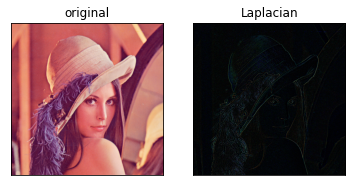

In [16]:
# 高斯拉普拉斯：cv2.Laplacian
lena_Laplacian = cv2.Laplacian(lena, -1)
jshow(lena_Laplacian, "Laplacian")

Sobel边缘提取是典型的基于一阶导数的边缘检测算法，能够很好地提取含噪声的图像边缘。缺点是Sobel算子并没有将图像的主题与背景严格地区分开来，换言之就是Sobel算子并没有基于图像灰度进行处理，由于Sobel算子并没有严格地模拟人的视觉生理特征，所以提取的图像轮廓有时并不能令人满意。

Canny是传统人工智能中目前最优秀的边缘检测算法，灰度化的处理和双阈值算法检测连接边缘可以使Canny算法检测到很多细节边缘且保真度高，缺点是针对不同的图片需要不断调节双阈值才能取得令人满意的结果。

高斯差分法DoG采用两组不同高斯参数进行滤波,并不注重边缘和背景之间的高对比度保留，适合用于图像锐化以及在含噪度很高的图像中提取边缘

拉普拉斯算⼦是图像⼆阶空间导数的⼆维各向同性测度。拉普拉斯算⼦可以突出图像中强度发⽣快速变化的区域，因此常⽤在边缘检测任务当中。在进⾏Laplacian操作之前通常需要先⽤⾼斯平滑滤波器对图像进⾏平滑处理，以降低Laplacian操作对于噪声的敏感性。

#### 3. 图像特征：灰度直方图、颜色直方图（RGB 空间、 HSV 空间）、方向梯度直方图（Histogram Of Gradient）

> 图像特征-灰度直方图

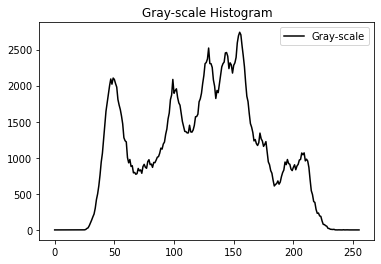

In [17]:
# 灰度直方图
lena_Gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)    # 先转换为灰度图
# 参数：图像、通道序号、掩模、横坐标bin数目、统计像素值区间，参数需带[]括号
hist = cv2.calcHist([lena_Gray], [0], None, [256], [0,255])
plt.plot(hist, 'black', label="Gray-scale")
plt.title("Gray-scale Histogram")
plt.legend()
plt.show()

> 图像特征-RGB直方图

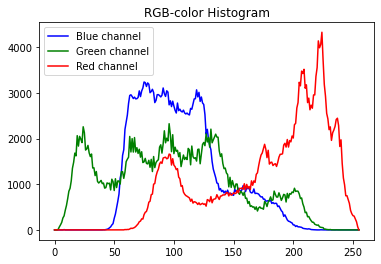

In [18]:
# RGB直方图
hist1 = cv2.calcHist([lena], [0], None, [256], [0,255])
plt.plot(hist1, 'b', label="Blue channel")
hist2 = cv2.calcHist([lena], [1], None, [256], [0,255])
plt.plot(hist2, 'g', label="Green channel")
hist3 = cv2.calcHist([lena], [2], None, [256], [0,255])
plt.plot(hist3, 'r', label="Red channel")
plt.title("RGB-color Histogram")
plt.legend()
plt.show()

> 图像特征-HSV直方图

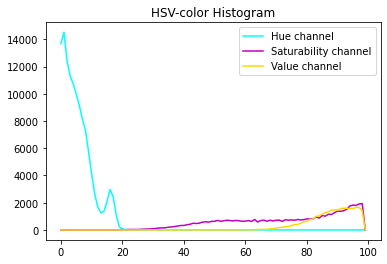

In [19]:
# HSV直方图
lena_HSV = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)    # 先转换为HSV颜色空间
hist1 = cv2.calcHist([lena_HSV], [0], None, [100], [0,99])
plt.plot(hist1, 'cyan', label="Hue channel")  # 色调H
hist2 = cv2.calcHist([lena_HSV], [1], None, [100], [0,99])
plt.plot(hist2, 'm', label="Saturability channel")  # 饱和度S
hist3 = cv2.calcHist([lena_HSV], [2], None, [100], [0,99])
plt.plot(hist3, 'gold', label="Value channel")  # 明度V
plt.title("HSV-color Histogram")
plt.legend()
plt.show()

> 图像特征-方向梯度直方图

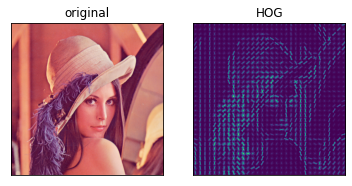

In [20]:
# 方向梯度直方图  使用skimage库
from skimage import feature, exposure
# 参数：图像、角度划分份数，cell内像素数，block内像素数，是否返回可显示图像
fd, hog_image = feature.hog(lena_Gray, orientations=9, pixels_per_cell=(16,16), cells_per_block=(3,3), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
jshow(hog_image_rescaled, "HOG", need_colortransfer=False)

图像直方图是图像的基本属性之一，也是图像像素数据分布的统计学特征。

利用灰度图像直方图，我们可以设定一些数字化的参数（例如数字照相机会分析图像的灰度直方图，从而可以以此来判断图像的清晰度等等），也可以分析出图像中灰度的变化，进而帮我们确定图像中不同灰度之间的阈值（灰度图分布的两个峰值之间），也可以通过调整灰度直方图分布来调整图像的对比度。

颜色直方图在此基础上更加细致地反映了图像中各种颜色的组成分布。在RGB直方图中，通过修改R、G、B各通道的颜色分布就可以获得多种不同的颜色；而HSV模型对应于画家配色的方法。画家用改变色浓和色深的方法从某种纯色获得不同色调的颜色，在一种纯色中加入白色以改变色浓，加入黑色以改变色深，同时 加入不同比例的白色，黑色即可获得各种不同的色调。

方向梯度直方图特征是一种在计算机视觉和图像处理中用来进行物体检测的特征描述子。HOG在目标检测Object Detection领域应用尤为广泛，因为以求梯度为主要内容的HOG特征能很好地描述局部目标的表象和形状，进而利用支持向量机SVM进行分类和检测任务。

## >>> 实验总结

通过本次实验，我了解了对数字图像处理的基本方法和应用场景，同时熟悉了python语法的使用和OpenCV等库的调用方法。

同时，本次实验因为需要展示大量图片，所以采用Jupyter Notebook的交互式运行方式，同时利用`%matplotlib inline`使得图片能在每一个代码cell运行完毕后即可展示；同时定义了`jshow()`函数并声明了完备的函数变量集使得每次展示图片都可以方便地只调用一次函数便可以得到结果，不需要每次都繁琐地调用多次`plt`函数，极大简化了代码。